In [1]:
!pip install qiskit pylatexenc qiskit-aer

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer.primitives import Sampler
from qiskit.quantum_info import Operator
import numpy as np
from qiskit_aer import AerSimulator
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from IPython.display import display
import random
from qiskit.circuit import Parameter

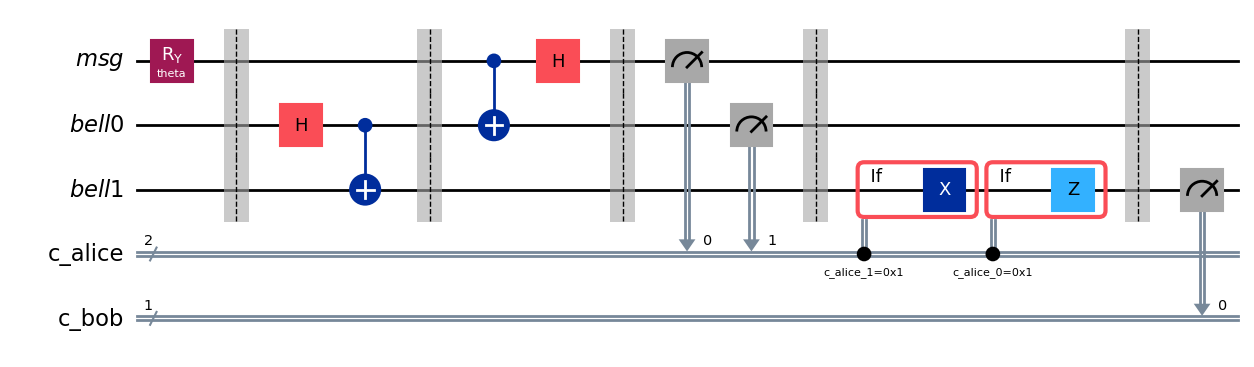

In [3]:
q_msg = QuantumRegister(1, name='msg')
q_bell0 = QuantumRegister(1, name='bell0')
q_bell1 = QuantumRegister(1, name='bell1')
c_alice = ClassicalRegister(2, name='c_alice')
c_bob = ClassicalRegister(1, name='c_bob')

qc = QuantumCircuit(q_msg, q_bell0, q_bell1, c_alice, c_bob)

theta = Parameter('theta')
qc.ry(theta, q_msg)
qc.barrier()

qc.h(q_bell0)
qc.cx(q_bell0, q_bell1)
qc.barrier()

qc.cx(q_msg, q_bell0)
qc.h(q_msg)
qc.barrier()

qc.measure(q_msg, c_alice[0])
qc.measure(q_bell0, c_alice[1])
qc.barrier()

with qc.if_test((c_alice[1], 1)):
    qc.x(q_bell1)
with qc.if_test((c_alice[0], 1)):
    qc.z(q_bell1)
qc.barrier()

qc.measure(q_bell1, c_bob)

display(qc.draw(output="mpl"))